<a href="https://colab.research.google.com/github/anisha99999/DNNs/blob/master/Session2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np        #scientific computing pkg

from keras.models import Sequential # plain stack of layers where each layer has exactly one input tensor and one output tensor
from keras.layers import Flatten # to flatten the input
from keras.layers import Convolution2D #convulation function for 2D inputs
from keras.utils import np_utils

from keras.datasets import mnist 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Returns the numpy arrays

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


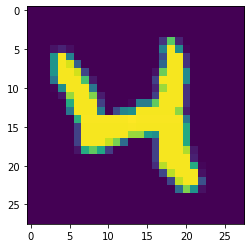

In [4]:
#returns the array size of X_train
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[20]) #printing the first dataset of the array
#plt.imshow(X_test[0])

In [0]:
#reshapes image array 2D to 3D
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#print (X_train.shape)
#plt.imshow(X_train[27][27])


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10] #extracts first 10 numbers from the array 
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x32
model.add(Convolution2D(64, 3, 3, activation='relu')) #24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu')) #22x22x128
model.add(Convolution2D(128, 3, 3, activation='relu'))  #20x20x128
model.add(Convolution2D(128, 3, 3, activation='relu')) #18x18x128
#model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #9x9x128

#model.add(Convolution2D(256, 3, 3, activation='relu')) #9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu')) #7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu')) #5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu')) #3x3x2048
model.add(Convolution2D(10, 3, 3, activation='relu')) #1x1x10

model.add(Flatten()) # flattens matrix into array =10
model.add(Activation('softmax')) #Softmax converts a real vector to a vector of categorical probabilities

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 512)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024,

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 2.3019 - accuracy: 0.0988
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 4/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 9/10
60000/60000 [==============================] - 60s 1ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 10/10
60000/60000 [==============================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[2.3025851249694824, 0.09799999743700027]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:10])
print(y_test[:10])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5 9]
